In [37]:
import pandas
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [38]:
data = pandas.read_csv('../house.csv')

In [39]:
data

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/16,2.5,...,1,1.0,202,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/16,2.5,...,1,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/17,2.5,...,2,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/17,2.5,...,2,1.0,94,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/16,2.5,...,1,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11656,23537,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/2017,16.7,...,2,2.0,652,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392
11657,23538,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/2017,6.8,...,2,2.0,333,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380
11658,23539,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,...,2,4.0,436,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380
11659,23541,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,...,1,5.0,866,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380


In [40]:
data.columns

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [41]:
data_train = data[['Rooms', 'Bathroom','Landsize','Lattitude','Longtitude','Price']]
data_train

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Price
0,2,1,202,-37.79960,144.99840,1480000
1,2,1,156,-37.80790,144.99340,1035000
2,3,2,134,-37.80930,144.99440,1465000
3,3,2,94,-37.79690,144.99690,850000
4,4,1,120,-37.80720,144.99410,1600000
...,...,...,...,...,...,...
11656,4,2,652,-37.90562,145.16761,1245000
11657,3,2,333,-37.85927,144.87904,1031000
11658,3,2,436,-37.85274,144.88738,1170000
11659,4,1,866,-37.85908,144.89299,2500000


In [42]:
X = data_train[['Rooms','Bathroom','Landsize','Lattitude','Longtitude']]
y = data_train['Price']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [44]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
predicts = model.predict(X_test)
predicts

array([1842535.,  856385., 1728155., ..., 1139530., 1091265.,  361670.])

In [52]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image
import os

os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [49]:
target=data_train['Price'].unique()
feature = ['Rooms','Bathroom','Landsize','Lattitude','Longtitude']

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0664667 to fit


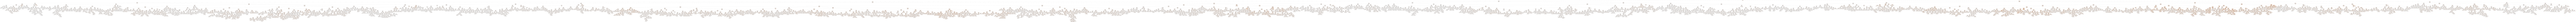

In [57]:
tree = model.estimators_[0]
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=feature,
                           class_names=target,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the Graphviz data
graph = graphviz.Source(dot_data)

# Display the graph
Image(graph.pipe(format='png'))